A1 Use librosa.effects.trim() to remove the silence parts of speech from beginning and end of your recorded signal. Listen to the new signal and perceptually compare the audio with original.

Original Audio:


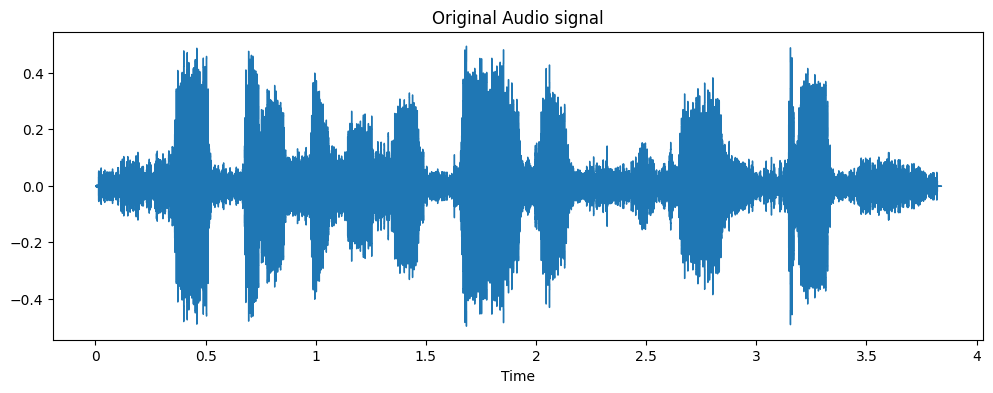

Trimmed Audio:


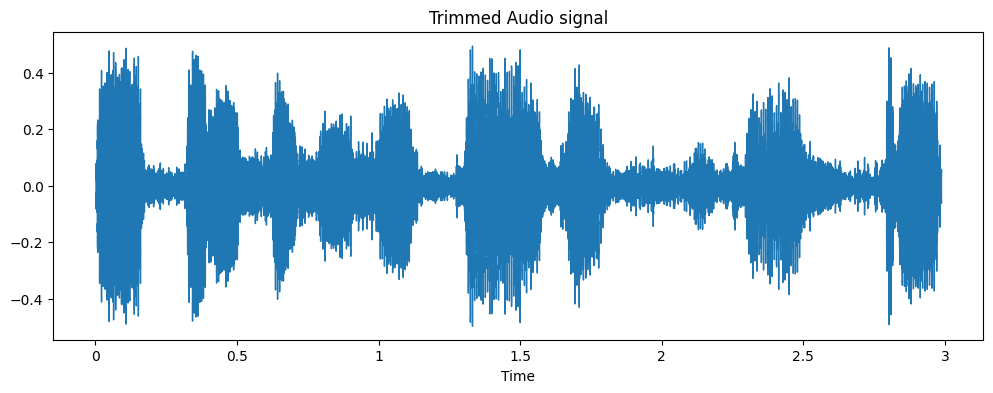

In [26]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

filename = 'lab3.wav'
signal, sr = librosa.load(filename, sr=None)
print("Original Audio:")
ipd.display(ipd.Audio(filename))

plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title('Original Audio signal')
plt.show()

trimmed_signal, index = librosa.effects.trim(signal, top_db=8)

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_signal, rate=sr))

plt.figure(figsize=(12, 4))
librosa.display.waveshow(trimmed_signal, sr=sr)
plt.title('Trimmed Audio signal')
plt.show()


A2. Use librosa.effects.split() to split the recorded speech with detected silences. Play
around with the top_db parameter and see the effects of split. Listen to the generated signals and
observe the split quality.

In [27]:
import librosa
import soundfile as sf
import numpy as np
audio = 'lab3.wav'
y, sr = librosa.load(audio_file, sr=None)
top_db_values = [10,15,25]
for top_db in top_db_values:
    intervals = librosa.effects.split(y, top_db=top_db)
    split_segments = []
    for interval in intervals:
        split_segments.append(y[interval[0]:interval[1]])
    split_audio = np.concatenate(split_segments)
    print(f"Audio after split (top_db={top_db})")
    ipd.display(ipd.Audio(split_audio, rate=sr))

Audio after split (top_db=10)


Audio after split (top_db=15)


Audio after split (top_db=25)


 A3 .Use the IEEE paper reference available above for silence detection. Compare the results with the
silence detection output from librosa package.

ANS
Low top_db values (10) result in more aggressive splitting, capturing quieter segments as separate splits.
This may lead to more fragmented speech with smaller isolated segments.
Moderate top_db values (15) offer a balance between granularity and cohesiveness, capturing moderately quiet segments without excessive fragmentation.
Higher top_db values (25) lead to less aggressive splitting, capturing only relatively loud segments.
This may result in fewer, but longer, speech segments.
The choice of top_db depends on the specific characteristics of your audio data and the desired level of granularity in the split signals

The ieee paper which i took for the reference has the similar results like if they have high top_db value the spliting is more and if they try with loe top_db value the spiliting is less